### EnKF for 10 floors

### Observing multiple floors - with averaged values


In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

from scipy.special import factorial

from scipy.stats import gaussian_kde

floors = 10

### When changing number of observations, the variance of chaos vector needs manual change
observed = 10

nrv = 2
order = 2
npc = (factorial(nrv+order) / ( factorial(nrv) * factorial(order) )).astype(int)
pccoeff =  int( npc + observed )
## First index is floor number and second is PC coefficient



# First floor
u10 = 1.1 # mean
u11 = 0.2 # xi1 
u12 = 0.3 # xi2
u13 = 0.2 # xi1 ^2 - 1
u14 = 0.15 # xi1* xi2
u15 = 0.3 # xi2 ^2 - 1
u16 = 0
u17 = 0

# Second floor
u20 = 1.2
u21 = 0.4
u22 = 0.2
u23 = 0.16
u24 = 0.22
u25 = 0.31
u26 = 0 
u27 = 0


# Third floor
u30 = 1.3
u31 = 0.4
u32 = 0.3
u33 = 0.19
u34 = 0.15
u35 = 0.34
u36 = 0
u37 = 0


# 4 th floor
u40 = 0.9 # mean
u41 = 0.3 # xi1 
u42 = 0.2 # xi2
u43 = 0.24 # xi1 ^2 - 1
u44 = 0.19 # xi1* xi2
u45 = 0.28 # xi2 ^2 - 1
u46 = 0
u47 = 0

# 5 th floor
u50 = 1.15
u51 = 0.4
u52 = 0.1
u53 = 0.4
u54 = 0.1
u55 = 0.18
u56 = 0 
u57 = 0


# 6 th floor
u60 = 1.4
u61 = 0.4
u62 = 0.4
u63 = 0.2
u64 = 0.1
u65 = 0.3
u66 = 0
u67 = 0


# 7 th floor
u70 = 1.15 # mean
u71 = 0.5 # xi1 
u72 = 0.1 # xi2
u73 = 0.19 # xi1 ^2 - 1
u74 = 0.2 # xi1* xi2
u75 = 0.16 # xi2 ^2 - 1
u76 = 0
u77 = 0

# 8 th floor
u80 = 1.3
u81 = 0.5
u82 = 0.2
u83 = 0.2
u84 = 0.1
u85 = 0.25
u86 = 0 
u87 = 0


# 9 th floor
u90 = 1.27
u91 = 0.3
u92 = 0.2
u93 = 0.1
u94 = 0.05
u95 = 0.13
u96 = 0
u97 = 0

# 10 th floor
u100 = 1.05
u101 = 0.2
u102 = 0.2
u103 = 0.19
u104 = 0.26
u105 = 0.2
u106 = 0
u107 = 0



## Creating matrix A_u with all PC coefficient vectors

U0 = np.array([[u10], [u20], [u30], [u40], [u50], [u60], [u70], [u80], [u90], [u100]])
U1 = np.array([[u11], [u21], [u31], [u41], [u51], [u61], [u71], [u81], [u91], [u101]])
U2 = np.array([[u12], [u22], [u32], [u42], [u52], [u62], [u72], [u82], [u92], [u102]])

U3 = np.array([[u13], [u23], [u33], [u43], [u53], [u63], [u73], [u83], [u93], [u103]])
U4 = np.array([[u14], [u24], [u34], [u44], [u54], [u64], [u74], [u84], [u94], [u104]])
U5 = np.array([[u15], [u25], [u35], [u45], [u55], [u65], [u75], [u85], [u95], [u105]])


A_f = np.zeros((floors,pccoeff))

A_f[:,0] = U0.reshape(floors)
A_f[:,1] = U1.reshape(floors)
A_f[:,2] = U2.reshape(floors)
A_f[:,3] = U3.reshape(floors)
A_f[:,4] = U4.reshape(floors)
A_f[:,5] = U5.reshape(floors)


nsamp =  100000
prior_ensemble = np.zeros((nsamp,floors))


# np.rng(40)

np.random.seed(31)

# Ucheck = np.zeros((nsamp,1))

xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)


eta1 = np.random.normal(0,1,nsamp)
eta2 = np.random.normal(0,1,nsamp)
eta3 = np.random.normal(0,1,nsamp)
eta4 = np.random.normal(0,1,nsamp)
eta5 = np.random.normal(0,1,nsamp)
eta6 = np.random.normal(0,1,nsamp)
eta7 = np.random.normal(0,1,nsamp)
eta8 = np.random.normal(0,1,nsamp)
eta9 = np.random.normal(0,1,nsamp)
eta10 = np.random.normal(0,1,nsamp)


prior_ensemble[:,0] = A_f[0,0] * np.ones(nsamp) + A_f[0,1] *  xi1 + A_f[0,2] *  xi2  + A_f[0,3] *  (xi1**2 - 1) + A_f[0,4] *  (xi1 * xi2) \
    + A_f[0,5] *  (xi2 **2 -1) 

# \
# + A_f[0,3] * eta1 + A_f[0,4] * eta2 + A_f[0,5] * eta3 +  A_f[0,6] * eta4 + A_f[0,7] * eta5 +  A_f[0,8] * eta6  +  A_f[0,9] * eta7+  A_f[0,10] * eta8 +  A_f[0,11] * eta9 +  A_f[0,12] * eta10


prior_ensemble[:,1] = A_f[1,0] * np.ones(nsamp) + A_f[1,1] *  xi1 + A_f[1,2] *  xi2 + A_f[1,3] *  (xi1**2 - 1) + A_f[1,4] *  (xi1 * xi2) \
    + A_f[1,5] *  (xi2 **2 -1)

# \
# + A_f[1,3] * eta1 + A_f[1,4] * eta2 + A_f[1,5] * eta3 +  A_f[1,6] * eta4  + A_f[1,7] * eta5 +  A_f[1,8] * eta6  +  A_f[1,9] * eta7+  A_f[1,10] * eta8 + A_f[1,11] * eta9 +  A_f[1,12] * eta10


prior_ensemble[:,2] = A_f[2,0] * np.ones(nsamp) + A_f[2,1] *  xi1 + A_f[2,2] *  xi2 + A_f[2,3] *  (xi1**2 - 1) + A_f[2,4] *  (xi1 * xi2) \
    + A_f[2,5] *  (xi2 **2 -1) 

# \
# + A_f[2,3] * eta1 + A_f[2,4] * eta2 + A_f[2,5] * eta3 +  A_f[2,6] * eta4 + A_f[2,7] * eta5 +  A_f[2,8] * eta6  +  A_f[2,9] * eta7+  A_f[2,10] * eta8  + A_f[2,11] * eta9 +  A_f[2,12] * eta10



prior_ensemble[:,3] = A_f[3,0] * np.ones(nsamp) + A_f[3,1] *  xi1 + A_f[3,2] *  xi2 + A_f[3,3] *  (xi1**2 - 1) + A_f[3,4] *  (xi1 * xi2) \
    + A_f[3,5] *  (xi2 **2 -1)

# \
# + A_f[3,3] * eta1 + A_f[3,4] * eta2 + A_f[3,5] * eta3 +  A_f[3,6] * eta4  + A_f[3,7] * eta5 +  A_f[3,8] * eta6  +  A_f[3,9] * eta7+  A_f[3,10] * eta8 + A_f[3,11] * eta9 +  A_f[3,12] * eta10



prior_ensemble[:,4] = A_f[4,0] * np.ones(nsamp) + A_f[4,1] *  xi1 + A_f[4,2] *  xi2 + A_f[4,3] *  (xi1**2 - 1) + A_f[4,4] *  (xi1 * xi2) \
    + A_f[4,5] *  (xi2 **2 -1)

# \
# + A_f[4,3] * eta1 + A_f[4,4] * eta2 + A_f[4,5] * eta3 +  A_f[4,6] * eta4  + A_f[4,7] * eta5 +  A_f[4,8] * eta6  +  A_f[4,9] * eta7+  A_f[4,10] * eta8 + A_f[4,11] * eta9 +  A_f[4,12] * eta10



prior_ensemble[:,5] = A_f[5,0] * np.ones(nsamp) + A_f[5,1] *  xi1 + A_f[5,2] *  xi2 + A_f[5,3] *  (xi1**2 - 1) + A_f[5,4] *  (xi1 * xi2) \
    + A_f[5,5] *  (xi2 **2 -1) 
# \
# + A_f[5,3] * eta1 + A_f[5,4] * eta2 + A_f[5,5] * eta3 +  A_f[5,6] * eta4 +  A_f[5,7] * eta5 +  A_f[5,8] * eta6  +  A_f[5,9] * eta7+  A_f[5,10] * eta8 + A_f[5,11] * eta9 +  A_f[5,12] * eta10



prior_ensemble[:,6] = A_f[6,0] * np.ones(nsamp) + A_f[6,1] *  xi1 + A_f[6,2] *  xi2  + A_f[6,3] *  (xi1**2 - 1) + A_f[6,4] *  (xi1 * xi2) \
    + A_f[6,5] *  (xi2 **2 -1) 

# \
# + A_f[6,3] * eta1 + A_f[6,4] * eta2 + A_f[6,5] * eta3 +  A_f[6,6] * eta4 + A_f[6,7] * eta5 +  A_f[6,8] * eta6  +  A_f[6,9] * eta7+  A_f[6,10] * eta8 + A_f[6,11] * eta9 +  A_f[6,12] * eta10



prior_ensemble[:,7] = A_f[7,0] * np.ones(nsamp) + A_f[7,1] *  xi1 + A_f[7,2] *  xi2  + A_f[7,3] *  (xi1**2 - 1) + A_f[7,4] *  (xi1 * xi2) \
    + A_f[7,5] *  (xi2 **2 -1) 

# \
# + A_f[7,3] * eta1 + A_f[7,4] * eta2 + A_f[7,5] * eta3 +  A_f[7,6] * eta4 + A_f[7,7] * eta5 +  A_f[7,8] * eta6  +  A_f[7,9] * eta7+  A_f[7,10] * eta8 + A_f[7,11] * eta9 +  A_f[7,12] * eta10



prior_ensemble[:,8] = A_f[8,0] * np.ones(nsamp) + A_f[8,1] *  xi1 + A_f[8,2] *  xi2 + A_f[8,3] *  (xi1**2 - 1) + A_f[8,4] *  (xi1 * xi2) \
    + A_f[8,5] *  (xi2 **2 -1) 

# \
# + A_f[8,3] * eta1 + A_f[8,4] * eta2 + A_f[8,5] * eta3 +  A_f[8,6] * eta4  + A_f[8,7] * eta5 +  A_f[8,8] * eta6  +  A_f[8,9] * eta7+  A_f[8,10] * eta8 + A_f[8,11] * eta9 +  A_f[8,12] * eta10



prior_ensemble[:,9] = A_f[9,0] * np.ones(nsamp) + A_f[9,1] *  xi1 + A_f[9,2] *  xi2 + A_f[9,3] *  (xi1**2 - 1) + A_f[9,4] *  (xi1 * xi2) \
    + A_f[9,5] *  (xi2 **2 -1)

# \
# + A_f[9,3] * eta1 + A_f[9,4] * eta2 + A_f[9,5] * eta3 +  A_f[9,6] * eta4 + A_f[9,7] * eta5 +  A_f[9,8] * eta6  +  A_f[9,9] * eta7+  A_f[9,10] * eta8 + A_f[9,11] * eta9 +  A_f[9,12] * eta10
# 


## forecast : sample mean and sample covariance matrix


x_k_mean = np.mean(prior_ensemble, axis=0)

P_k = np.zeros((floors,floors))


P_k = np.cov(prior_ensemble,rowvar=False)

print("forecast mean is", x_k_mean)


print("forecast cov is", P_k)



# varpclinear = [1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1]


varpcnonlinear = [1, 1, 1, 2, 1, 2, 1,1, 1, 1, 1, 1, 1, 1, 1, 1]

# varpcnonlinear = [1, 1, 1, 2, 1, 2, 1,1]

P_k_pckf = np.zeros((floors,floors))


for i in range(1,pccoeff):
    P_k_pckf = P_k_pckf + varpcnonlinear[i] * (A_f[:,i].reshape(floors,1) @  (A_f[:,i].reshape(floors,1)).T)


check = P_k_pckf - P_k

print("difference covariance between pckf and enkf is", check)

print("max of check is", np.amax(check))



Hk = np.zeros((observed,floors))

for i in range(observed):
    Hk[i,i] = 1

print("H_k is",Hk)



dk = np.zeros((observed,floors))

# noise = np.eye(observed)
Gamma = np.eye(observed)

noisevar = [0.8,0.8,0.8,0.8,0.5,1.5,1.5,0.6,2.0,0.8]

np.random.seed(108)

nsteps = 1

epsilon = np.random.normal(0,1,size=(observed,nsteps))


Gamma = Gamma * noisevar

H_knoise = np.eye((observed))


truesample = np.loadtxt('./data_sample.txt')


print("true data sample is",truesample.reshape(floors,1))

noise = np.sqrt(noisevar).reshape(observed,1) * epsilon

print("noise is",noise)
# sample = sample.reshape(floors,1)

# print(noise)
d_k = truesample.reshape(observed,1) + noise

print("noisy data",d_k)


forecast mean is [1.09980388 1.20097191 1.30069961 0.90059064 1.15151065 1.40025165
 1.15161787 1.30150348 1.27050072 1.04988159]
forecast cov is [[0.41278871 0.42362326 0.47287321 0.41318209 0.39408377 0.47513683
  0.33290146 0.40553408 0.2456302  0.33567874]
 [0.42362326 0.49257189 0.52522387 0.45325765 0.44342301 0.51240478
  0.42505599 0.48178711 0.2838182  0.36290469]
 [0.47287321 0.52522387 0.57635611 0.49097385 0.4811771  0.5752265
  0.44204247 0.52176054 0.31407895 0.38786433]
 [0.41318209 0.45325765 0.49097385 0.43915657 0.45317328 0.48360119
  0.38996253 0.44595631 0.26066093 0.3534934 ]
 [0.39408377 0.44342301 0.4811771  0.45317328 0.56603936 0.479429
  0.44115988 0.48181137 0.27267739 0.35078404]
 [0.47513683 0.51240478 0.5752265  0.48360119 0.479429   0.59003908
  0.43287085 0.52056276 0.32310687 0.38245893]
 [0.33290146 0.42505599 0.44204247 0.38996253 0.44115988 0.43287085
  0.42444735 0.44705891 0.26005531 0.30907909]
 [0.40553408 0.48178711 0.52176054 0.44595631 0.4818

perturbation size is (10, 100000)
sample noise covariance is [[ 7.92040805e-01 -3.47272371e-03  2.86300793e-03 -1.91114028e-03
   4.17660580e-03  3.31816135e-04  7.55768764e-04 -1.46993711e-03
   5.86120139e-05  3.61299251e-03]
 [-3.47272371e-03  7.98671856e-01 -1.81589801e-03  4.77076621e-03
   2.02468083e-03 -1.90360442e-03  3.36090978e-03  1.83742805e-03
  -2.80943970e-03 -3.76360938e-03]
 [ 2.86300793e-03 -1.81589801e-03  7.96587511e-01 -1.17991626e-03
  -2.44011240e-03 -7.39017254e-04 -1.81899581e-03  1.77562267e-03
  -2.89250615e-03 -2.14268406e-03]
 [-1.91114028e-03  4.77076621e-03 -1.17991626e-03  8.01675204e-01
   2.46429110e-03  5.48199590e-04 -6.82462522e-04 -3.06546965e-03
   1.43183869e-03 -7.71499641e-04]
 [ 4.17660580e-03  2.02468083e-03 -2.44011240e-03  2.46429110e-03
   5.03311620e-01  5.30812173e-03  6.20954772e-04  7.13909425e-04
   8.93105094e-04  1.23653104e-03]
 [ 3.31816135e-04 -1.90360442e-03 -7.39017254e-04  5.48199590e-04
   5.30812173e-03  1.49770207e+00 -4.2

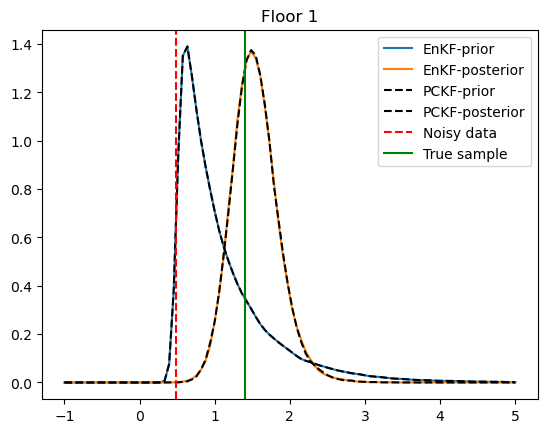

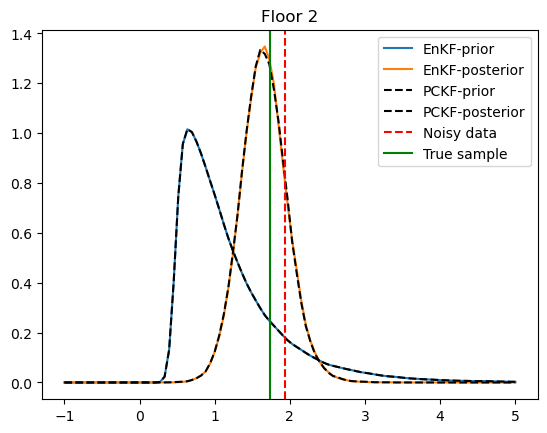

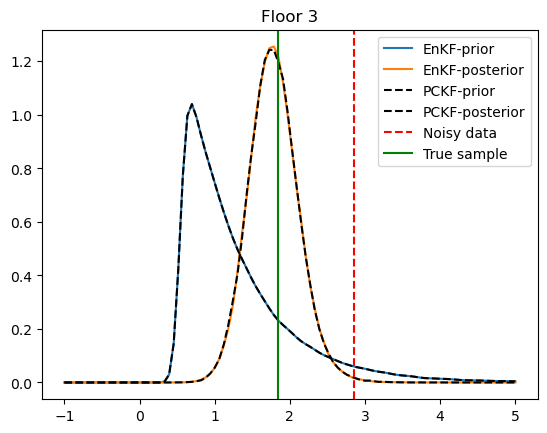

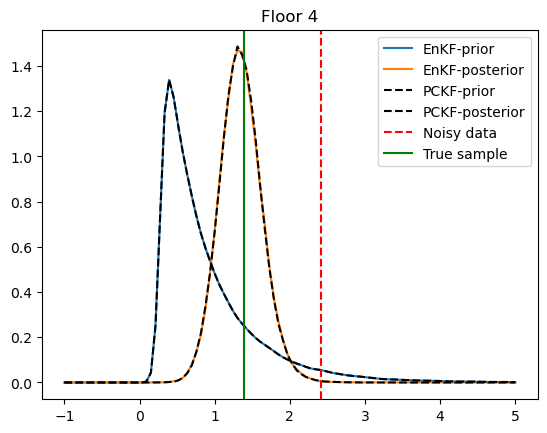

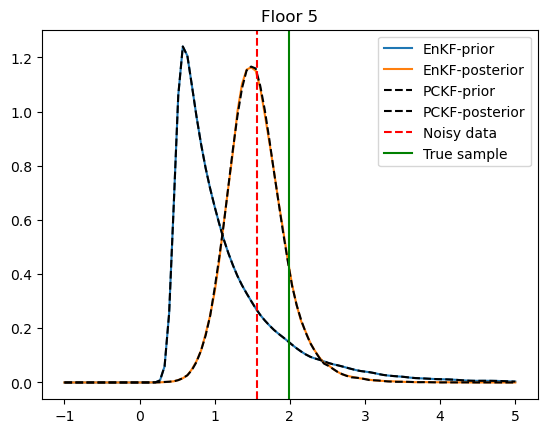

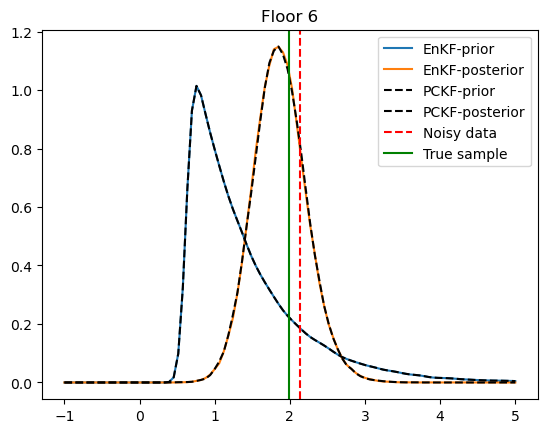

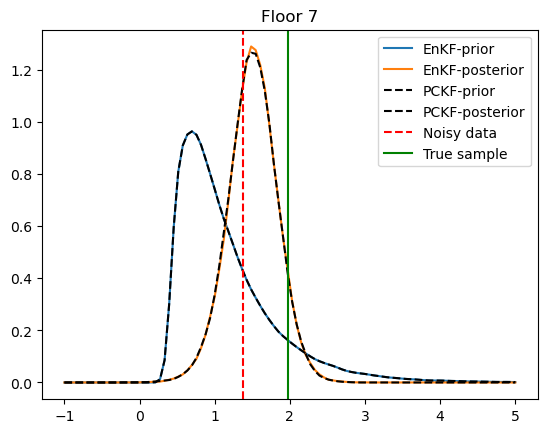

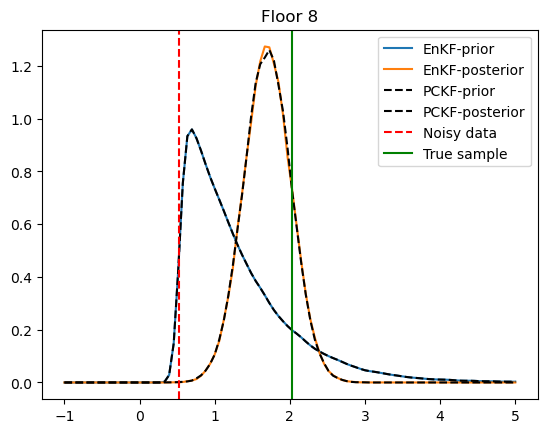

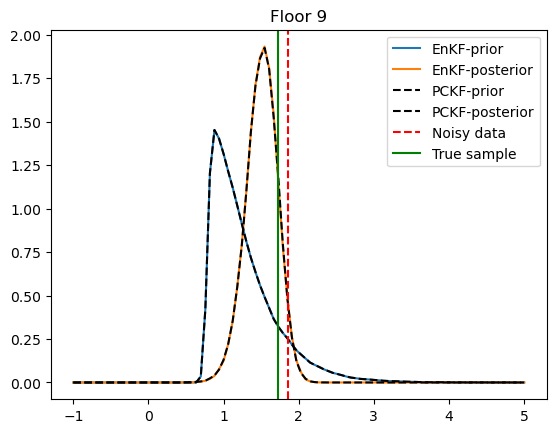

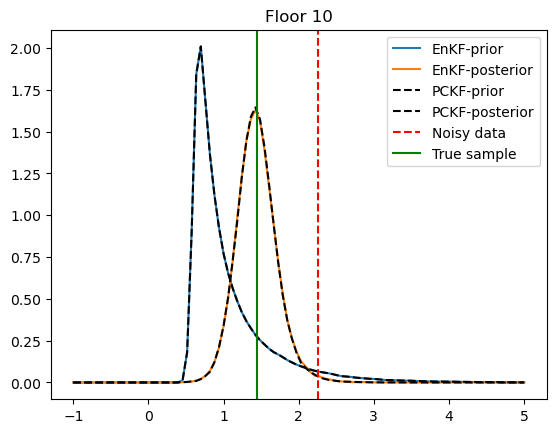

In [2]:


# perturbed samples

e = np.random.normal(0,1,size=(observed,nsamp))

print("perturbation size is", e.shape)

for i in range(observed):
    e[i,:] = e[i,:] * np.sqrt(Gamma[i,i])

gamma_sample = np.cov(e)


print("sample noise covariance is",gamma_sample)


d_ki =  np.zeros((nsamp,observed))

P_a = np.zeros((floors,floors))



for i in range(nsamp):
    d_ki[i,:] = (d_k + e[:,i].reshape(observed,1)).reshape(observed)


print("d_ki is", d_ki)


K_g = P_k @ Hk.T @ np.linalg.inv(Hk @ P_k @ Hk.T + gamma_sample)


print("Kalman gain is \n", K_g)

### Update state using samples

update_ensemble = np.zeros((nsamp,floors))

for i in range(nsamp):
    sample = prior_ensemble[i,:].reshape(floors,1) + K_g @ (d_ki[i,:].reshape(observed,1) - Hk @ prior_ensemble[i,:].reshape(floors,1))
    update_ensemble[i,:] = sample.reshape(floors)


### updated sample means and cov

print(update_ensemble.shape)

x_a_mean = np.mean(update_ensemble, axis=0)

x_a_mean = x_a_mean.reshape(floors,1)

print("updated mean is", x_a_mean)

# for i in range(nsamp):
#     P_a = P_a + (x_ai[:,i].reshape(statesize,1) - x_a_mean) @ (x_ai[:,i].reshape(statesize,1) - x_a_mean).T

# P_a = P_a/ (nsamp - 1)

P_a = np.cov(update_ensemble,rowvar=False)

P_a_check = (np.identity(floors) - K_g @ Hk) @ P_k

print("updated covariance is", P_a)

print("updated covariance check is", P_a_check)



x1 = np.linspace(-1,5, 100)

x2 = np.linspace(-1,5, 100)



kde_floor = np.zeros((100,floors))

kde_floor_up = np.zeros((100,floors))


pzfile_prior = np.load('./pckf_prior_pdfs.npz')

pckf_prior = pzfile_prior['x']

pzfile_update = np.load('./pckf_update_pdfs.npz')

pckf_update = pzfile_update['x']

for i in range(floors):

    kde1 = gaussian_kde(prior_ensemble[:,i], bw_method='scott')
    kde2 = gaussian_kde(update_ensemble[:,i], bw_method='scott')

    kde_floor[:,i] = kde1(x1)
    kde_floor_up[:,i] = kde2(x2)

    plt.figure(i)
    plt.title(f"Floor {i+1}")
    plt.plot(x1,kde_floor[:,i],label = 'EnKF-prior')
    plt.plot(x2,kde_floor_up[:,i],label = 'EnKF-posterior')
    plt.plot(x1,pckf_prior[:,i],'k--',label = 'PCKF-prior')
    plt.plot(x2,pckf_update[:,i],'k--',label = 'PCKF-posterior')
    plt.axvline(d_k[i], color='red', linestyle='--', label=f'Noisy data')
    plt.axvline(truesample[i], color='green', linestyle='-', label=f'True sample')
    plt.legend()
    plt.savefig(f'pckf_enkf_{i}.pdf')
    plt.show()






In [3]:


# if(observed == 1):
#     npzfile_prior = np.load('./enkf_prior_1data_nonlinear.npz')
#     npzfile_posterior = np.load('./enkf_prior_1data_nonlinear.npz')
# else:
#     npzfile_prior = np.load('./enkf_prior_2data_nonlinear.npz')
#     npzfile_posterior = np.load('./enkf_prior_2data_nonlinear.npz')


# print(npzfile_prior)

# print(npzfile_posterior)

# plt.figure(1)
# plt.title("Floor 1")
# plt.plot(x1,npzfile_prior['x'],label = 'EnKF-prior')
# plt.plot(x1,npzfile_posterior['x'],label = 'EnKF-posterior')
# plt.plot(x1,kde_floor1,'k--',label = 'PCKF-prior')
# plt.plot(x1,kde_floor1_up,'k--',label = 'PCKF-posterior')
# # plt.axvline(dk[0,0], color='red', linestyle='--', label='data point- floor 1')
# plt.legend()
# plt.savefig('PCKF_floor1_1data_nonlinear.pdf')
# plt.show()